<a href="https://colab.research.google.com/github/LeJQC/MSDS/blob/main/DATA_602_Final_Project_Maternal_Age_and_Infant_Mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Age and Infant Mortality

## Abstract

This study explores the relationship between maternal age and infant mortality rates. Data was gathered from the Centers for Disease Control and Prevention (CDC) Wide-ranging ONline Data for Epidemiologic Research (WONDER) database spanning from 2007 to 2021.

A Welch's ANOVA test was performed to identify if there was a statisical difference between the age groups and infant mortality rate. The analysis showed a statistically significant difference in mortality rates across the maternal age groups. Although the test showed a statistical significance, the clinical significance of the results warrants further dicussion. Only a small proportion, 2%, of the variance in mortality rate was attributed to maternal age differences. Therefore, this study suggests that other factors also significantly contribute to infant mortality rates. Thus, more research is needed in identifying these factors and reducing the amount of infant deaths.

## Introduction

Having worked at the Nenonatal intensive care unit (NICU) at my hospital the past couple of months, I have been always curious with what factors are associated  with infant mortality. This study investigates the potential correlation between maternal age and infant morality rate. The data in this study was collected from the CDC WONDER database which compiles their information from infant death certificates.

The null hypothesis is that the mortality rate across the different ages groups of women are equal. The alternative hypotheiss is that at least one group is different from the others.

In this analysis, the dependent variable is the mortality rate, a continuous variable, and the independent variable is categorical groups of the mother's age.

## Exploratory Data Analysis / Data Wrangling


In [ ]:
#pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett
import pingouin as pg

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20602/Final%20Project/Linked%20Birth%20%20Infant%20Death%20Records%2C%202007-2021.csv")

In [ ]:
df.head()

,Notes,Age of Mother,Age of Mother Code,ICD Chapter,ICD Chapter Code,Age of Infant at Death,Age of Infant at Death Code,Gender,Gender Code,Year of Death,Year of Death Code,Deaths,Births,Death Rate
0,NaN,Under 15 years,15,Certain infectious and parasitic diseases,A00-B99,Under 1 hour,1,Female,F,2007,2007,0,3011,0
1,NaN,Under 15 years,15,Certain infectious and parasitic diseases,A00-B99,Under 1 hour,1,Female,F,2008,2008,0,2755,0
2,NaN,Under 15 years,15,Certain infectious and parasitic diseases,A00-B99,Under 1 hour,1,Female,F,2009,2009,0,2460,0
3,NaN,Under 15 years,15,Certain infectious and parasitic diseases,A00-B99,Under 1 hour,1,Female,F,2010,2010,0,2225,0
4,NaN,Under 15 years,15,Certain infectious and parasitic diseases,A00-B99,Under 1 hour,1,Female,F,2011,2011,0,1888,0


In [ ]:
col = ["Age of Mother", "ICD Chapter", "Age of Infant at Death", "Gender", "Year of Death", "Deaths", "Births"]
df = df[col]
df.head()

,Age of Mother,ICD Chapter,Age of Infant at Death,Gender,Year of Death,Deaths,Births
0,Under 15 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2007,0,3011
1,Under 15 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2008,0,2755
2,Under 15 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2009,0,2460
3,Under 15 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2010,0,2225
4,Under 15 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2011,0,1888


In [ ]:
df.info() #Deaths should be a int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age of Mother           27000 non-null  object
 1   ICD Chapter             27000 non-null  object
 2   Age of Infant at Death  27000 non-null  object
 3   Gender                  27000 non-null  object
 4   Year of Death           27000 non-null  int64 
 5   Deaths                  27000 non-null  object
 6   Births                  27000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
df["Deaths"].value_counts()

0             17994
Suppressed     5809
10              104
13               77
12               68
              ...  
479               1
436               1
409               1
446               1
218               1
Name: Deaths, Length: 476, dtype: int64

A big chunk of the "Deaths" count is suppressed. From the foot notes, the term "Suppressed" replaces vital statistics, when the figure represents one through nine (1-9) births or deaths. I decided to use the median of this range, 5, to replace the suppressed value.

In [ ]:
df["Deaths"] = df["Deaths"].replace("Suppressed", 5)

In [ ]:
df["Deaths"].value_counts()

0      17994
5       5809
10       104
13        77
12        68
       ...  
479        1
436        1
409        1
446        1
218        1
Name: Deaths, Length: 476, dtype: int64

In [ ]:
df["Deaths"] = df["Deaths"].astype(int)

In [ ]:
# Summary Statistics
df.describe()

,Year of Death,Deaths,Births
count,27000.000000,27000.000000,27000.000000
mean,2014.000000,13.568370,218954.670370
std,4.320574,54.898806,220768.318331
min,2007.000000,0.000000,238.000000
25%,2010.000000,0.000000,3579.000000
50%,2014.000000,0.000000,124539.000000
75%,2018.000000,5.000000,467263.000000
max,2021.000000,825.000000,617243.000000


In [ ]:
# Creating a new mortality rate column
df["Mortality Rate"] = df["Deaths"]/df["Births"]*1000

In [ ]:
df.sort_values("Mortality Rate", ascending=False)

,Age of Mother,ICD Chapter,Age of Infant at Death,Gender,Year of Death,Deaths,Births,Mortality Rate
26281,50 years and over,Certain conditions originating in the perinata...,1 - 23 hours,Female,2008,5,246,20.325203
26251,50 years and over,Certain conditions originating in the perinata...,Under 1 hour,Female,2008,5,246,20.325203
25321,50 years and over,Diseases of the circulatory system,28 - 364 days,Female,2008,5,246,20.325203
26434,50 years and over,"Congenital malformations, deformations and chr...",1 - 23 hours,Female,2011,5,274,18.248175
26374,50 years and over,Certain conditions originating in the perinata...,28 - 364 days,Female,2011,5,274,18.248175
...,...,...,...,...,...,...,...,...
15008,35-39 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2015,0,258212,0.000000
15009,35-39 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2016,0,267985,0.000000
15010,35-39 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2017,0,271208,0.000000
15011,35-39 years,Certain infectious and parasitic diseases,Under 1 hour,Female,2018,0,276581,0.000000


Mortality Rate 20.32 --> There are 20 deaths for every 1000 births

In [ ]:
grouped_df = df.groupby("Age of Mother")["Mortality Rate"].mean()
grouped_df.sort_values(ascending=False)

Age of Mother
50 years and over    0.419790
Under 15 years       0.362535
45-49 years          0.169032
15-19 years          0.092662
40-44 years          0.080412
20-24 years          0.071912
25-29 years          0.056598
35-39 years          0.056575
30-34 years          0.049698
Name: Mortality Rate, dtype: float64

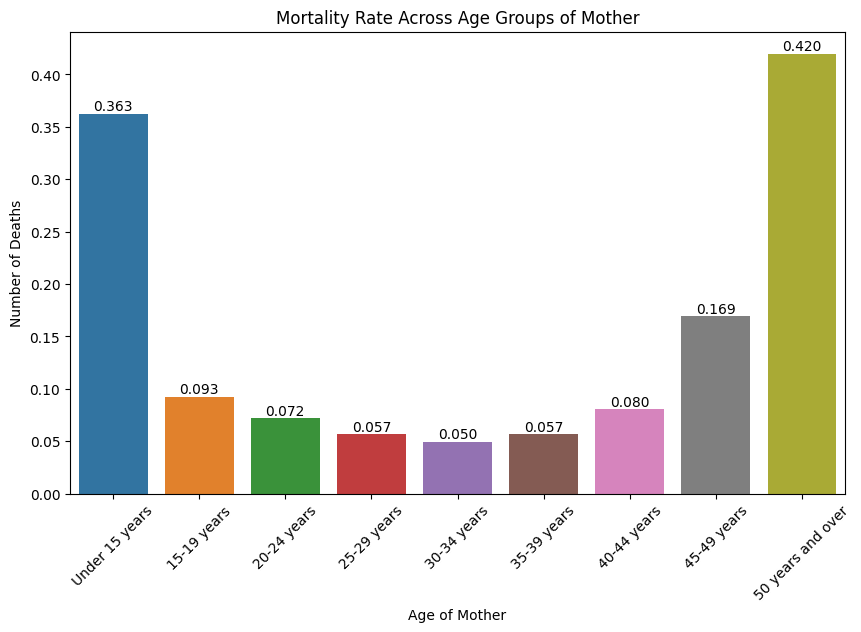

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Age of Mother", y="Mortality Rate", data=df, errorbar=None)
plt.title("Mortality Rate Across Age Groups of Mother")
plt.xlabel("Age of Mother")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,fmt="%.3f")
plt.show()

The women who are above 50 years old and below 15 years old have the highest mortality rate, by far.

Let's look at the most common cause of infant deaths.

In [ ]:
cause_df = df.groupby("ICD Chapter")["Mortality Rate"].mean()
cause_df.sort_values(ascending=False)

ICD Chapter
Certain conditions originating in the perinatal period                                                 1.426019
Congenital malformations, deformations and chromosomal abnormalities                                   0.693858
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified                0.245336
External causes of morbidity and mortality                                                             0.179154
Diseases of the circulatory system                                                                     0.129585
Certain infectious and parasitic diseases                                                              0.105085
Diseases of the respiratory system                                                                     0.079339
Diseases of the nervous system                                                                         0.043242
Diseases of the genitourinary system                                                        

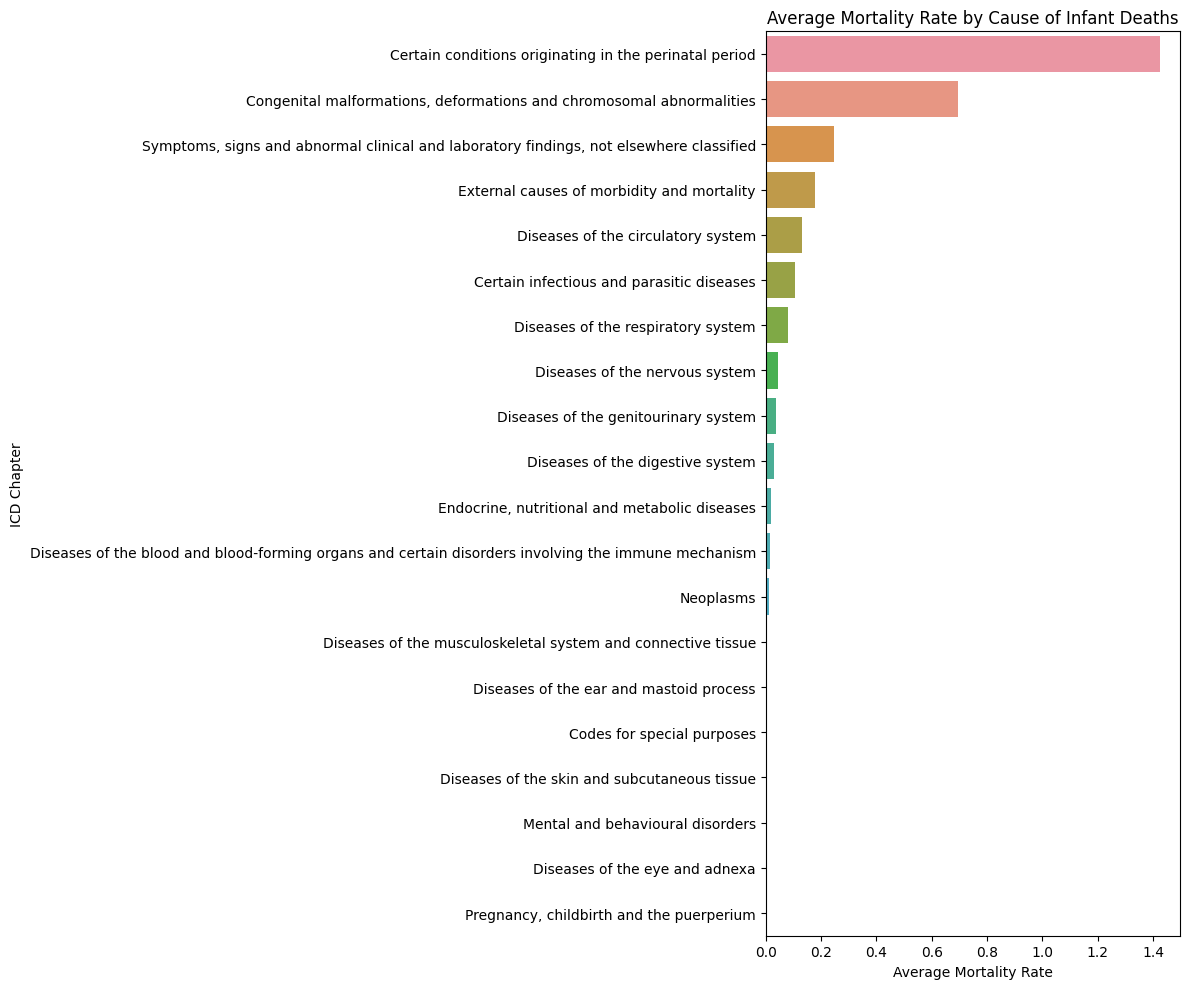

In [ ]:
cause_df = df.groupby("ICD Chapter")["Mortality Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x=cause_df.values, y=cause_df.index)
plt.title("Average Mortality Rate by Cause of Infant Deaths")
plt.xlabel("Average Mortality Rate")
plt.ylabel("ICD Chapter")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

"Certain conditions originating in the perinatal period" includes premature births (before 37 weeks) or low birth weight (below 5.5 pounds). I remember reading a stat that says infants with low birth weight are 20x more likely to die than heavier babies.

Next, let's see if the amount of deaths has changed throughout the years.

In [ ]:
df_year = df.groupby("Year of Death")["Deaths"].sum()

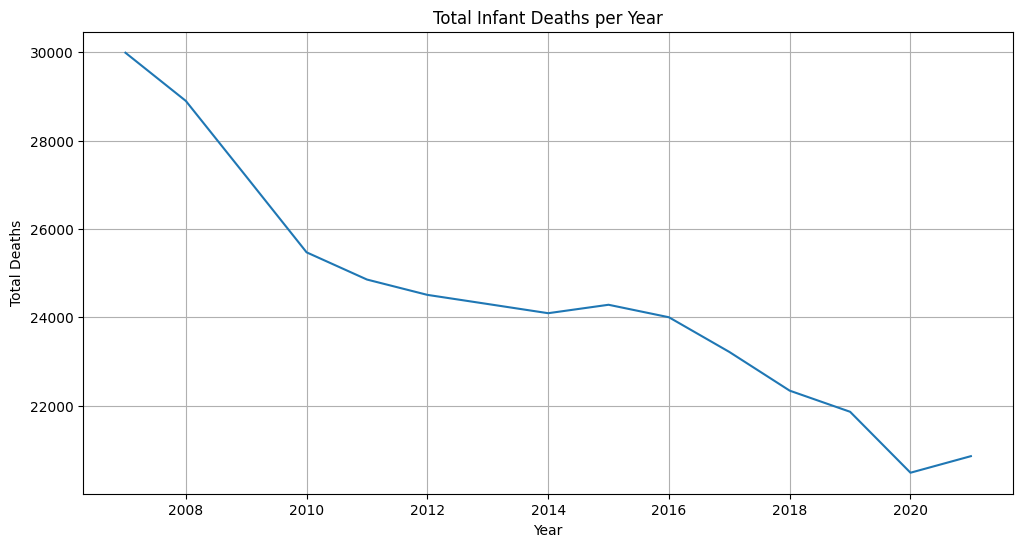

In [ ]:
plt.figure(figsize=(12, 6))
df_year.plot(kind='line')
plt.title("Total Infant Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

The number of deaths has significantly decreased throughout the years. In 2007, the totals deaths was 30000 and by 2021 the total deaths is 21000, a 30% decrease!

## Data Analysis

To identify if there is a statisically significant difference in mortality rates across the multiple group of ages, I am going to use an ANOVA test.  

**Null Hypothesis**: There is no difference in the means of the mortality rate across all age groups.

**Alternative Hypotheiss**: There is a difference in the means of the mortality rate across all age groups.

**ANOVA Assumptions**:


*   Independence Assumption - each group is independent of each other
*   Equal Variance Assumption - based on Bartlett's test, each group does not have same variance so we have to perform the Welch's ANOVA test.



One way to check the assumptions in an ANOVA test is to look at the boxplot of the data. Here, we see that that variance across the group is not equal due to the size of the boxes not being equal. Also, there are a lot of outliers in the data that can skew the results of the ANOVA test.

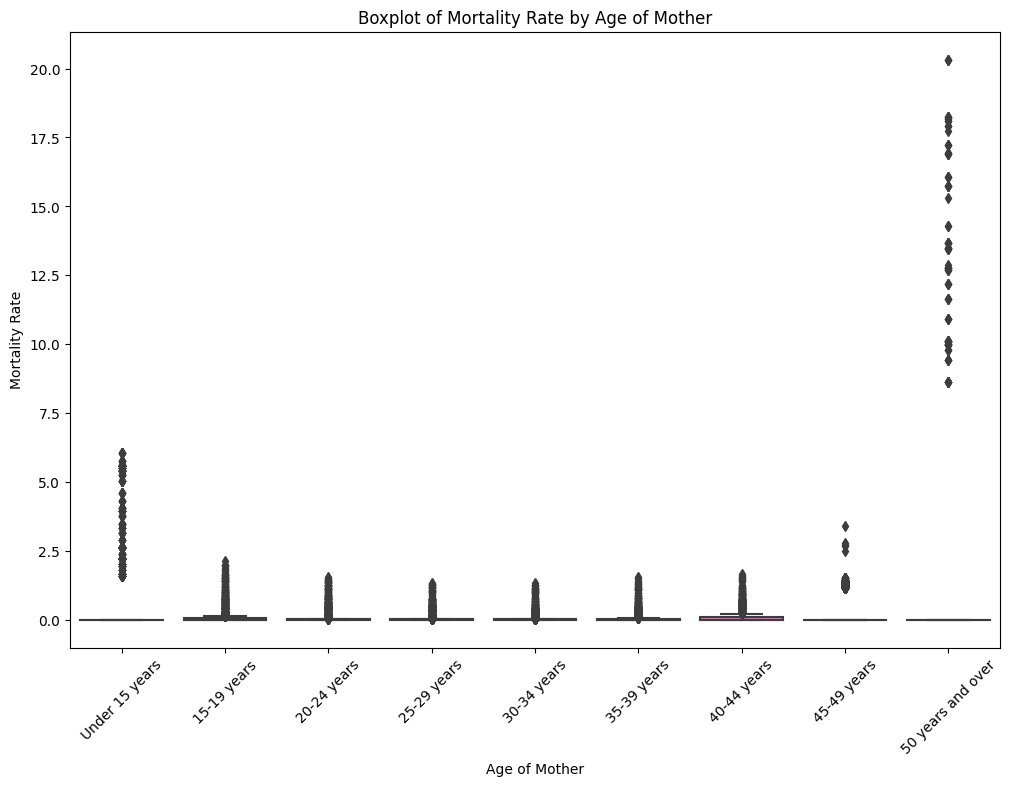

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Age of Mother", y="Mortality Rate", data=df)
plt.title("Boxplot of Mortality Rate by Age of Mother")
plt.xlabel("Age of Mother")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Splits data into groups based on Age of Mother
groups = [group["Mortality Rate"].values for name, group in df.groupby("Age of Mother")]

stat, p = bartlett(*groups)

print(f"Bartlett’s Test Statistic: {stat}, P-value: {p}")

Bartlett’s Test Statistic: 54463.153794059486, P-value: 0.0


A p-value less than 0.05 on the Bartlett's test indicates we have to reject the null hypothesis that each group as the same variance. Thus, the assumption of equal variance is violated so we have to perform the Welch's ANOVA test.

In [ ]:
welch_anova = pg.welch_anova(dv="Mortality Rate", between="Age of Mother", data=df)
print(welch_anova)

          Source  ddof1        ddof2          F          p-unc       np2
0  Age of Mother      8  11143.28811  66.023527  2.359788e-106  0.020747


Let's go throught the results


*   Source: "Age of Mother", the variable be tested
*   ddof1 (degrees of freedom between groups): the value is 8 but there are 9 age groups being compared
*   ddof2 (degrees of freedom within groups): the adjustment in Welch's ANOVA to accout for the variances and sample sizes of each group.
*   F (F-statistic): the ratio of variance between groups over variance within groups. A high F-statistic, like 66, indicates that the group means are significantly different.
*   **p-unc (p-value)**: the p-value is extremely small at 2.35e-106, indicating that there is a statistically significant difference in mortality rates across the age groups.
*   np2 (partial eta squared): similar to the R-squared, which describes the proportion of variability the independent variable has on the dependent variable. In this case, 0.02 or 2% of the total variance in mortality rate can be attributed to the difference in maternal age groups.




## Conclusion

Based on the results of the Welch's ANOVA test, we can reject the null hypothesis and conclude that there is a statistically significant difference in mortality rates across different age groups.

However, although the results are statistically significant, the clinical significance in mortality rates between the different age groups is debatable. As shown in the partial eta squared, only 2% of the total variance in mortality rate can be attributed to the difference in maternal age groups. This indicates that while maternal age is a factor, it only accounts for a small proportion in the overall variance in infant mortality rates.

As the data shows, there has been a 30% decrease in the total number of infant deaths from 2007 to 2021. Obviously, the goal is to get infant deaths as close to zero as possible. Future research needs to be done to identify and analyze the other factors that contribute to infant mortality. Hopefully, with time and new discovers, the number of infant deaths will become 0.